In [2]:
# Load a local copy of the current ODYM branch:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
#from seaborn.palettes import color_palette
import xlrd
import pylab
from copy import deepcopy
import logging as log
from xlrd.biffh import BIFF_FIRST_UNICODE
import xlwt
from scipy.stats import norm
from cycler import cycler
#import seaborn as sns
import dynamic_stock_model as dsm
import product_component_model as pcm

In [3]:
# Loading data
path = os.getcwd()
data = pd.read_csv(path+"/data/Supplementary_information/dummy_data_battery.csv", header=0 , sep=',')
# This is just to replace all the void values in "data" by 0, which makes things easier
data.fillna(0, inplace=True)

# We store the time and inflows values in two lists
time = data['Time'].to_numpy()
stock_cars = data['Population'].to_numpy() 
years = len(time)

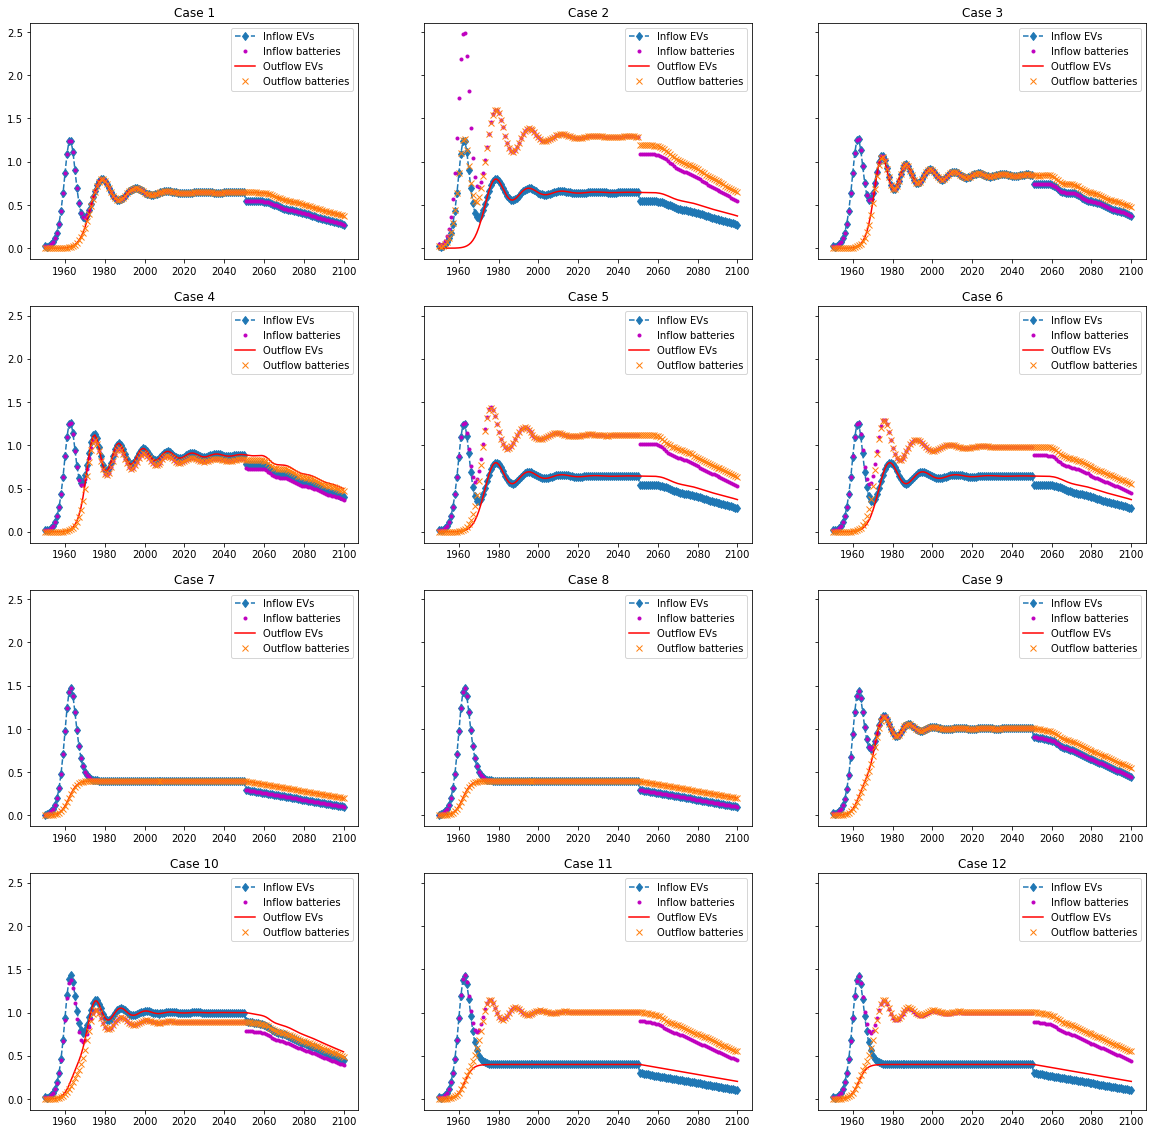

In [15]:
fig, axs = plt.subplots(4, 3, figsize=(20,20), sharey=True)
cm_mean = 12
cm_std = 2
pr_mean = 15
pr_std = 4
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, 
                                  lt_cm={'Type': 'Normal', 'Mean':np.array([cm_mean]), 'StdDev': np.array([cm_std])}, 
                                  lt_pr={'Type': 'Normal', 'Mean':np.array([pr_mean]), 'StdDev': np.array([pr_std])},
                                  d=0.04, reuse_coeff=0.3, replacement_coeff=1)
# Case 1
Model.case_1()
axs[0, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 0].set_title('Case 1')
axs[0, 0].legend(loc='best')

# Case 2
Model.case_2()

axs[0, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 1].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 1].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[0, 1].set_title('Case 2')
axs[0, 1].legend(loc='best')

# Case 3
Model.case_3()

axs[0, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 2].set_title('Case 3')
axs[0, 2].legend(loc='best')

# Case 4

Model.case_4()
axs[1, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 0].set_title('Case 4')
axs[1, 0].legend(loc='best')

# Case 5

Model.case_5()
axs[1, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 1].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 1].set_title('Case 5')
axs[1, 1].legend(loc='best')


# Case 6

Model.case_6()

axs[1, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 2].set_title('Case 6')
axs[1, 2].legend(loc='best')


# Case 7a

Model.case_7()

axs[2, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 0].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[2, 0].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[2, 0].set_title('Case 7')
axs[2, 0].legend(loc='best')


# Case 8a

Model.case_8()

axs[2, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 1].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[2, 1].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[2, 1].set_title('Case 8')
axs[2, 1].legend(loc='best')

# Case 9

Model.case_9()

axs[2, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[2, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[2, 2].set_title('Case 9')
axs[2, 2].legend(loc='best')


# Case 10

Model.case_10()

axs[3, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[3, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 0].set_title('Case 10')
axs[3, 0].legend(loc='best')


# Case 11

Model.case_11()

axs[3, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 1].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[3, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 1].set_title('Case 11')
axs[3, 1].legend(loc='best')


# Case 12

Model.case_12()

axs[3, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 2].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[3, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 2].set_title('Case 12')
axs[3, 2].legend(loc='best')

plt.show()

## hazard function check

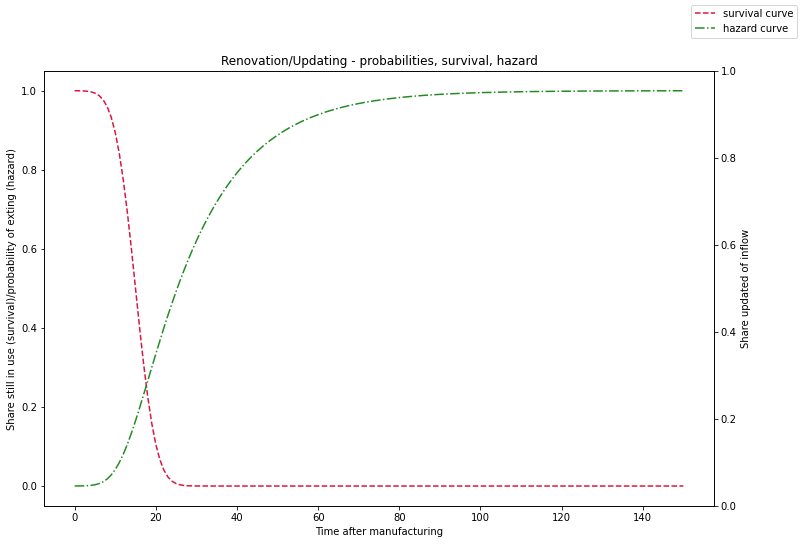

In [16]:
cohort = 0
hazard_curve = Model.hz_pr[:,cohort]
#Model.compute_pdf_pr()
#pdf_curve  = Model.pdf_pr[:,cohort]
survival_curve = Model.sf_pr[:,cohort]
fig = plt.figure(figsize=(12,8))
ax1 = fig.subplots()
ax1.plot(survival_curve,'--', c = 'crimson', label = 'survival curve')
ax1.plot(hazard_curve, '-.', c = 'forestgreen', label = 'hazard curve')
ax1.set_xlabel('Time after manufacturing') 
ax1.set_ylabel('Share still in use (survival)/probability of exting (hazard)')
ax2 = ax1.twinx()
#ax2.plot(pdf_curve, c = 'blue', lw = 2,  label = 'Share (probability) updated')
plt.ylabel('Share updated of inflow')

#make the legend for all
lines = []
labels = []
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
fig.legend(lines, labels, loc = 'upper right')
plt.title('Renovation/Updating - probabilities, survival, hazard')
plt.show()

## Visualizing the renovation for case 5 separatly

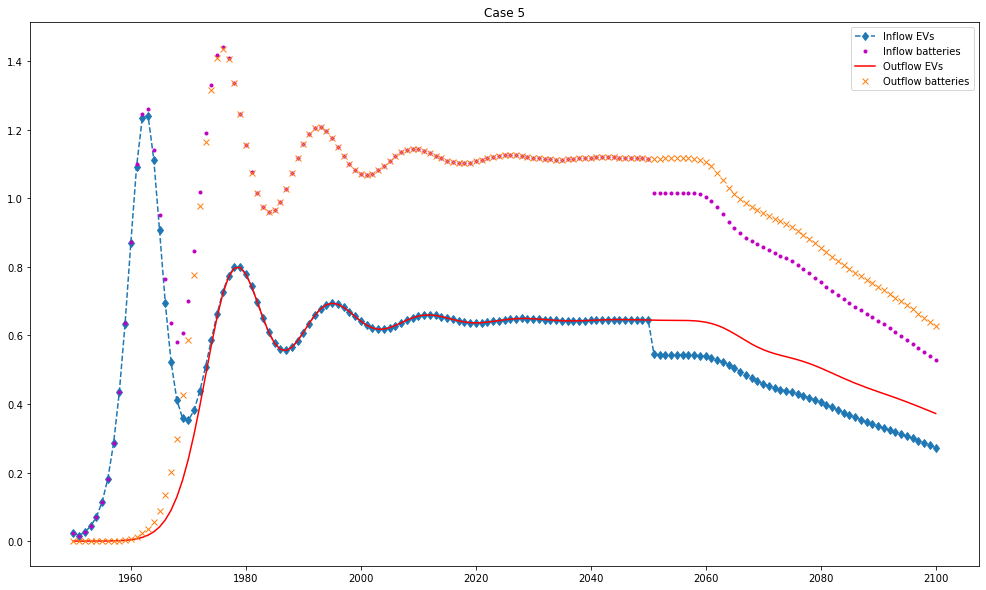

In [17]:
# Case 5

Model.case_5()
fig = plt.figure(figsize = (17,10))
plt.plot(time, Model.i_pr, 'd--', label='Inflow EVs')
plt.plot(time, Model.i_cm, 'm.', label='Inflow batteries')
plt.plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
plt.plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
plt.title('Case 5')
plt.legend(loc='best')

### getting the product time - cohort matrix and visualizing it

[[2.47262320e-002 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [2.47226659e-002 1.59787111e-002 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [2.47141495e-002 1.59764066e-002 2.62379529e-002 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [2.52392381e-244 6.48982500e-241 3.98359807e-237 ... 2.86040815e-001
  0.00000000e+000 0.00000000e+000]
 [5.95914996e-248 1.63102285e-244 1.06566619e-240 ... 2.85999561e-001
  2.79235898e-001 0.00000000e+000]
 [1.32182220e-251 3.85095213e-248 2.67823233e-244 ... 2.85901041e-001
  2.79195626e-001 2.72430574e-001]]
[[2.47262320e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.47226654e-02 1.59787116e-02 0.00000000e+00 0.0000

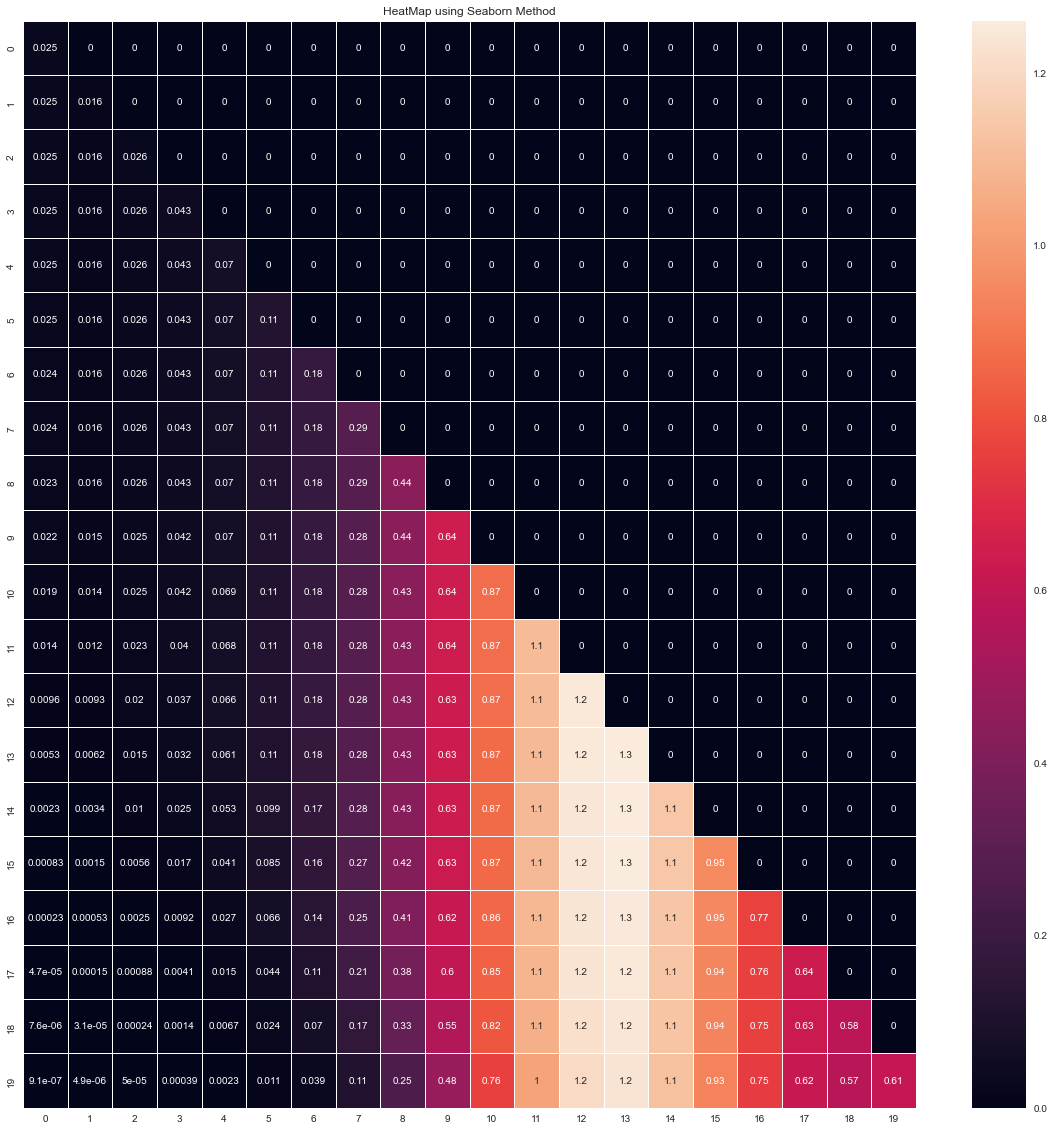

In [18]:
print(Model.sc_pr)
#data is the Model_sc_cm matrix of the first 50 years
data = Model.sc_cm[0:20,0:20]
print(data)
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")
 
# 2. Generate a 10x10 random integer matrix

figsize = np.shape(data)
print(f'we will have a figure in the size : {figsize}.')
 
# 3. Plot the heatmap
plt.figure(figsize=figsize)
heat_map = sns.heatmap(data, linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

## Now we create a model with only one cohort stock as the total stock - meaning we should have inflows in year 1 only

In [19]:
def create_model_single_inflow(cohort:int):
    '''creates the pcm model with stock in a way we have a single inflow (*1000) in year cohort.'''
    stock_one_cohort = []
    for slice_in_time in Model.sc_pr:
        #print(f'this slice looks like this: {slice_in_time}.')
        stock_one_cohort.append(slice_in_time[cohort])
    return pcm.ProductComponentModel(t=time, s_pr = np.einsum('i,->i', stock_one_cohort, 10000), 
                                    lt_cm={'Type': 'Normal', 'Mean':np.array([cm_mean]), 'StdDev': np.array([cm_std])}, 
                                    lt_pr={'Type': 'Normal', 'Mean':np.array([pr_mean]), 'StdDev': np.array([pr_std])},
                                    d=0.04, reuse_coeff=0.3, replacement_coeff=1)
Model1 = create_model_single_inflow(100)

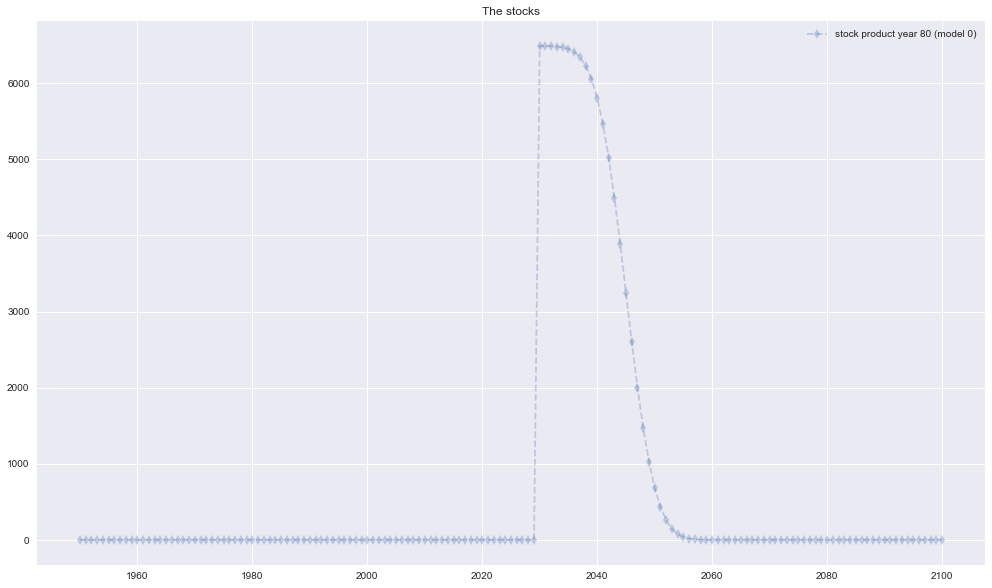

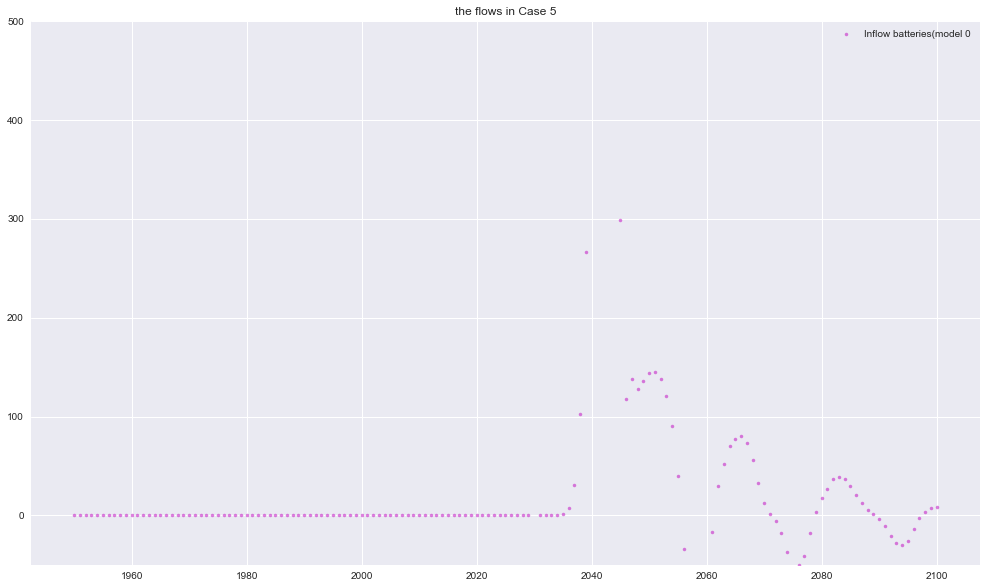

In [20]:

fig = plt.figure(figsize = (17,10))
for index, year in enumerate(range(80,140,100)):
    Model1 = create_model_single_inflow(year)
    Model1.case_5()
    plt.plot(time, Model1.s_pr, 'd--', label= f'stock product year {year} (model {index})', alpha = 0.3)
plt.title(f'The stocks')
plt.legend(loc = 'best')
plt.show()

fig = plt.figure(figsize = (17,10))
for index, year in enumerate(range(80,140,100)):
    Model1 = create_model_single_inflow(year)
    Model1.case_5()
    #plt.plot(time, Model1.i_pr, 'd--', label=f'Inflow EVs (model {index}', alpha = 0.5)
    plt.plot(time, Model1.i_cm, 'm.', label=f'Inflow batteries(model {index}', alpha = 0.5)
    #plt.plot(time, Model1.oc_pr.sum(axis=1),'r', label='Outflow EVs')
    #plt.plot(time, Model1.oc_cm.sum(axis=1),'s', color = 'black', alpha = 0.5, label='Outflow batteries')
plt.title('the flows in Case 5')
plt.legend(loc='best')
plt.ylim((-50, 500))
plt.show()

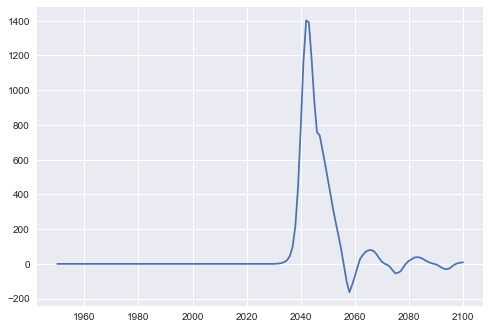

In [21]:
Model1.oc_cm.sum(axis=1)
plt.plot(time, Model1.oc_cm.sum(axis=1))